# Data Exploration

In [2]:
import pandas as pd
import numpy as np

## Load Data and view summary statistics

In [3]:
data=pd.read_csv('./datasets/crop_yield.csv')

In [4]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

- 10 attributes
- One target attribute (Yield_tons_per_hectare)
- One million entries with no missing values

In [6]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


- Notice the **min** value for *Yield_tons_per_hectare*, it says -1.147613
- Very likely anomaly or erroneous data

In [7]:
negative_yield_rows = data[data['Yield_tons_per_hectare'] < 0]

# Print the rows
print(negative_yield_rows[['Yield_tons_per_hectare']])


        Yield_tons_per_hectare
756                  -0.007103
7799                 -0.061283
8421                 -0.119911
9553                 -0.193093
15435                -0.009811
...                        ...
975666               -0.471038
982738               -0.255772
987054               -0.120282
995837               -0.051633
998040               -0.125976

[231 rows x 1 columns]


- Will drop 231 rows from the dataset (in data preparation phase) in this case as yield cannot be negative

In [8]:
print(data.shape)

(1000000, 10)


In [9]:
data.describe

<bound method NDFrame.describe of        Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0        West     Sandy   Cotton   897.077239            27.676966   
1       South      Clay     Rice   992.673282            18.026142   
2       North      Loam   Barley   147.998025            29.794042   
3       North     Sandy  Soybean   986.866331            16.644190   
4       South      Silt    Wheat   730.379174            31.620687   
...       ...       ...      ...          ...                  ...   
999995   West      Silt     Rice   302.805345            27.987428   
999996  South    Chalky   Barley   932.991383            39.661039   
999997  North     Peaty   Cotton   867.362046            24.370042   
999998   West      Silt    Wheat   492.812857            33.045505   
999999   West     Sandy    Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                 False             True      

In [10]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# storing unique values for each cateogorical to see possible values for each attribute 
unique_values = {}

for col in non_numeric_columns:
    unique_values[col] = data[col].unique() 
    print(f"{col}: {unique_values[col]}")

Region: ['West' 'South' 'North' 'East']
Soil_Type: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crop: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Fertilizer_Used: [False  True]
Irrigation_Used: [ True False]
Weather_Condition: ['Cloudy' 'Rainy' 'Sunny']


In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


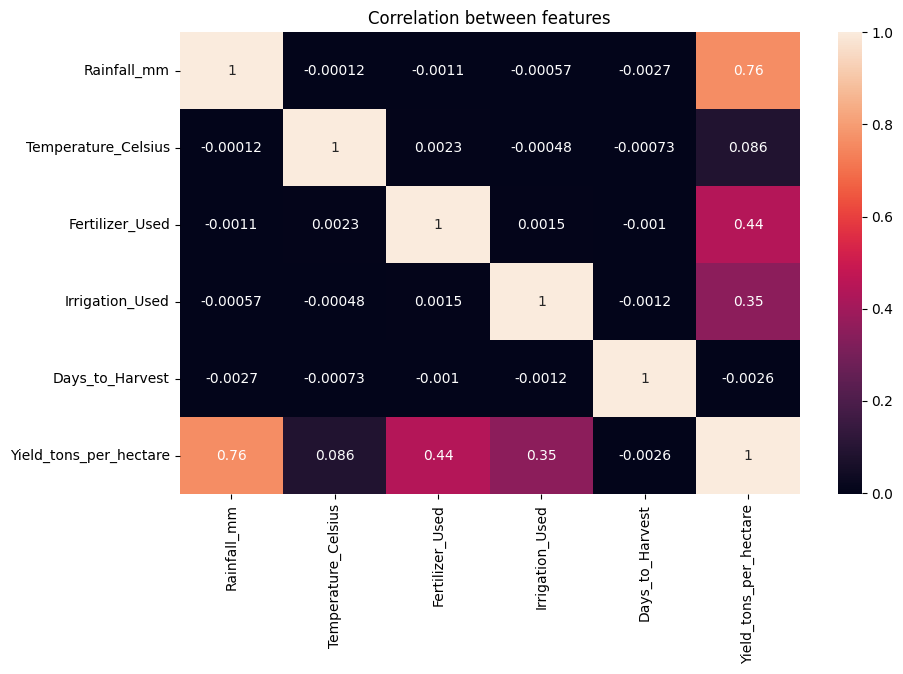

In [12]:
# correlation matrix for features and viewing using heatmap
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title("Correlation between features")
plt.show()

## Correlations
- We can see from the heatmap that there is a strong positive correlation (0.76) between the rainfall in mm and the yield_tons_per_hectare
- Other promising features include whether fertilizer was used and whether irrigation was used

<Axes: xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

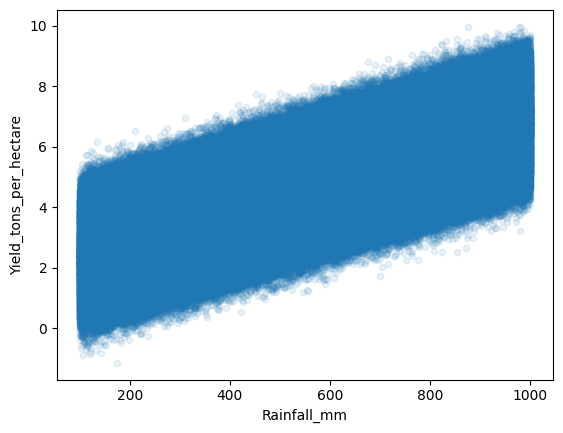

In [13]:
data.plot(kind="scatter", x="Rainfall_mm", y="Yield_tons_per_hectare", alpha=0.1)
# visualsing the positive correlation between rainfall and yield using a scatter graph

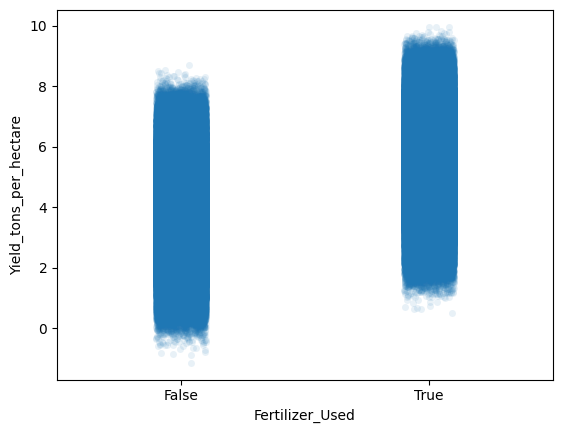

In [14]:

sns.stripplot(x="Fertilizer_Used", y="Yield_tons_per_hectare", data=data, jitter=True, alpha=0.1)
plt.show()

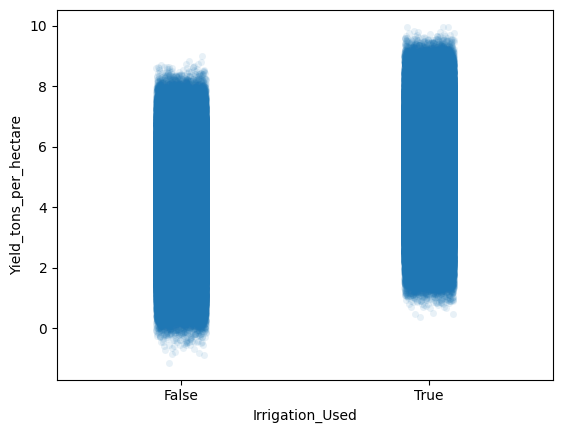

In [15]:

sns.stripplot(x="Irrigation_Used", y="Yield_tons_per_hectare", data=data, jitter=True, alpha=0.1)
plt.show()

- Using fertilizer and irrigation both have a noticeable improvement in the yield for crops

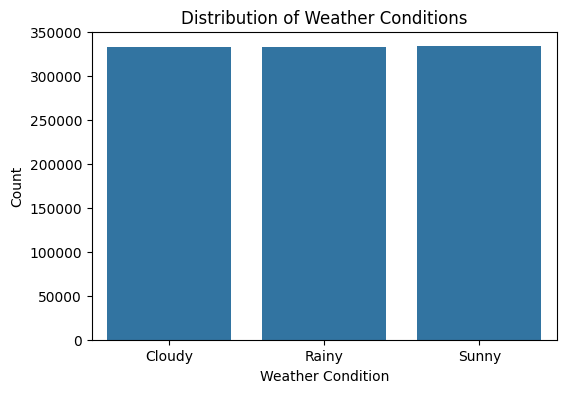

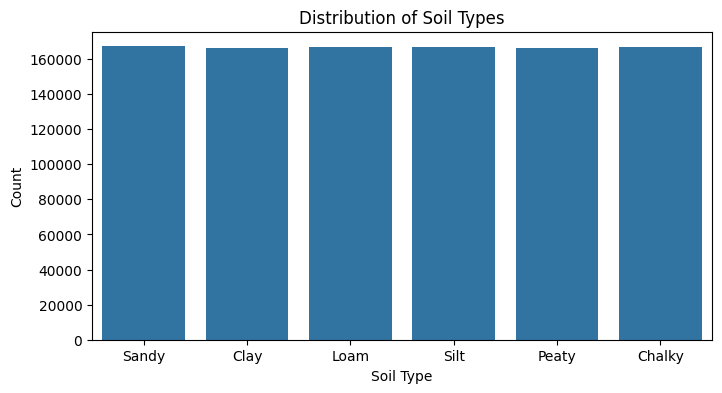

In [16]:
# Distribution of weahter conditions
plt.figure(figsize = (6,4))
sns.countplot(x = 'Weather_Condition', data = data)
plt.title("Distribution of Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

# Distribution of soil types
plt.figure(figsize=(8,4))
sns.countplot(x = 'Soil_Type', data = data)
plt.title("Distribution of Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

- Notice that the distribution for the amount of values is approximately the exact same for all weather conditions and soil types

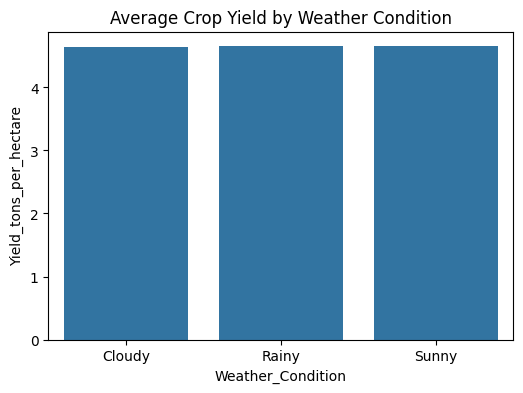

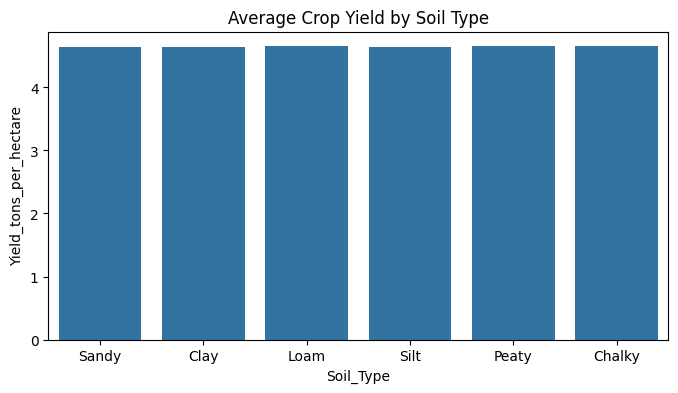

In [24]:
# Plotting for any correlation between the weather conditions, soil types and the yield
# Mean yield depending on weather category
plt.figure(figsize = (6,4))
sns.barplot(x = 'Weather_Condition', y = 'Yield_tons_per_hectare', data = data, estimator = 'mean', errorbar=None)
plt.title("Average Crop Yield by Weather Condition")
plt.show()

# Mean yield depending on soil type used
plt.figure(figsize = (8,4))
sns.barplot(x = 'Soil_Type', y = 'Yield_tons_per_hectare', data = data, estimator = 'mean', errorbar=None)
plt.title("Average Crop Yield by Soil Type")
plt.show()

- The yield_tons_per_hectare is about the exact same when comparing the different weather conditions and the different soil types
- Likely because the dataset could be synthetic
- During modelling will focus less on these two attributes then